## Numerical Methods Week 6
# Least Squares
## Based on Tim Sauer's "Numerical Analysis" (Chapter 4, 4.1-4.4)

#### Importing required Python modules

In [1]:
import numpy as np
from scipy.optimize import curve_fit
from sympy import *
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore', np.RankWarning)
from IPython.display import Image

## 4.1 Least Squares and the Normal Equations

Chapter 3 addressed finding polynomials that exactly fit data points. However, if the data points are numerous, or the data points are collected only within some margin of error, fitting a high-degree polynomial exactly is rarely the best approach. In such cases, it is more reasonable to fit a simpler model that may only approximate the data points. Both problems, solving inconsistent systems of equations and fitting data approximately, are driving forces behind least squares.

### 4.1.1 Inconsistent systems of equations

A system of equations with no solution is called **inconsistent**. What is the meaning of a system with no solutions? Perhaps the coefficients are slightly inaccurate. In many cases, the number of equations is greater than the number of unknown variables, making it unlikely that a solution can satisfy all the equations or that such a solution might even exist. An alternative in this situation is to find a vector $x$ that comes the closest to being a solution. If we choose this "closeness" to mean close in Euclidean distance, there is a straight-forward algorithm for finding the closest $x$. This special $x$ will be called the **least squares solution**.

Assume that $A$ is a given $m \times n$ matrix with either $m > n$ or $m < n$, $x$ is a vector of $n$ unknownks and $b$ is a given $m$-vector. Then, apparently, the system:

$$Ax = b$$

is inconsistent and typically it cannot be solved (uniquely). However, noticing that $A^TA$ is a $n \times n$ matrix, the following system: 

$$A^TAx = A^Tb$$

is called system of **normal equations** for the inconsistent system $Ax = b$ and it admits a unique solution $x = \bar{x}$ (as far as $A^TA$ is non-singular). Furthermore, the solution $\bar{x}$ to $A^TAx = A^Tb$ is called **least squares solution** of the inconsistent system $Ax = b$. 

The least squares solution $\bar{x}$ is an approximation to the missing solution of $Ax = b,$ in the sense that it minimizes the **residual**:

$$r = b - Ax.$$

Actually, this minimization is assured by measuring the following (equivalent) errors: 

1. The **2-norm** (or **Euclidean norm**) of the error defined as:

$$||r||_2 = \sqrt{\sum_{i=1}^m r_i^2},$$

2. The **squared error** defined as:

$$\textrm{SE} = ||r||_2^2 = \sum_{i=1}^m r_i^2,$$

3. The **root mean squared error** (i.e., the root of the mean of the squared error):

$$\textrm{RMSE} = \sqrt{\frac{\textrm{SE}}{m}} = \frac{||r||_2}{\sqrt{m}}.$$

### <span style="color:#19bfc2">EXAMPLE 4.1</span>

<span style="font-size:large;">The following system $Ax = b$ is apparently inconsistent:

<span style="font-size:large;">$$\begin{bmatrix}1&1\\1&-1\\1&1\end{bmatrix} \begin{bmatrix}x_1\\x_2\end{bmatrix} = \begin{bmatrix}2\\1\\3\end{bmatrix}.$$

<span style="font-size:large;">Use the normal equations to find the least squares solution of the inconsistent system.

In [2]:
def ls_ne_solution(A,b):
    A1=np.dot(A.T,A)
    b1=np.dot(A.T,b)
    X = np.linalg.solve(A1, b1)
    return X

In [3]:
A=np.array([[1,1],[1,-1],[1,1]])
b=np.array([2,1,3])
x=ls_ne_solution(A,b)
print("The least squares solution of this inconsistent system is",x.tolist())
r = b - np.dot(A,x)
print("The residual of the least squares solution of this inconsistent system is",[round(rr,3) for rr in r.tolist()])
euclNorm = np.linalg.norm(r)
sqE = sum([rr**2 for rr in r.tolist()])
RMSE = np.sqrt(sqE/len(r))
print("The 2-norm of the error is",round(euclNorm,3))
print("The squared error is",round(sqE,3))
print("The root mean squared error is",round(RMSE,3))

The least squares solution of this inconsistent system is [1.75, 0.75]
The residual of the least squares solution of this inconsistent system is [-0.5, 0.0, 0.5]
The 2-norm of the error is 0.707
The squared error is 0.5
The root mean squared error is 0.408


### <span style="color:#19bfc2">EXAMPLE 4.2</span>

<span style="font-size:large;">Solve the least squares problem:

<span style="font-size:large;">$$\begin{bmatrix}1&-4\\2&3\\2&2\end{bmatrix} \begin{bmatrix}x_1\\x_2\end{bmatrix} = \begin{bmatrix}-3\\15\\9\end{bmatrix}.$$

In [4]:
A=np.array([[1,-4],[2,3],[2,2]])
b=np.array([-3,15,9])
x=ls_ne_solution(A,b)
print("The least squares solution of this inconsistent system is",[round(xx,3) for xx in x.tolist()])
r = b - np.dot(A,x)
print("The residual of the least squares solution of this inconsistent system is",[round(rr,3) for rr in r.tolist()])
euclNorm = np.linalg.norm(r)
sqE = sum([rr**2 for rr in r.tolist()])
RMSE = np.sqrt(sqE/len(r))
print("The 2-norm of the error is",round(euclNorm,3))
print("The squared error is",round(sqE,3))
print("The root mean squared error is",round(RMSE,3))

The least squares solution of this inconsistent system is [3.8, 1.8]
The residual of the least squares solution of this inconsistent system is [0.4, 2.0, -2.2]
The 2-norm of the error is 3.0
The squared error is 9.0
The root mean squared error is 1.732


### 4.1.2 Fitting models to data

Let $(t_1,y_1), \ldots, (t_m,y_m)$ be a set of points in the plane, which we will often refer to as the "data points." Given a fixed class of models, such as all lines $y = c_1 + c_2t$, we can seek to locate the specific instance of the model that best fits the data points in the 2-norm. The core of the least squares idea consists of measuring the residual of the fit by the squared errors of the model at the data points and finding the model parameters that minimize this quantity. 

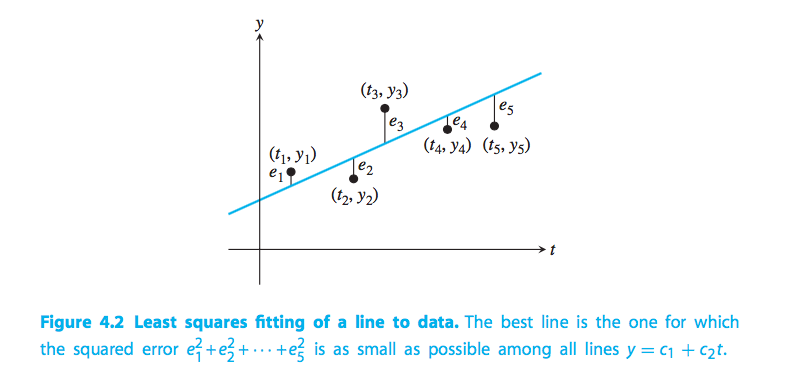

In [5]:
Image(filename='Images/04_1.png')

In [6]:
def normalEquations(data,d):
    x = np.array([dd[0] for dd in data])
    c=symbols('c0:%d' %(d+1))
    t=symbols('t')
    e=0
    for i in range(d+1):
        e += c[i]*t**i
    P = lambda z:e
    AA=[]
    for k in range(len(x)):
        AA.append(P(x[k]).subs(t,x[k]))  
    AA=np.array(AA)
    Fs=lambdify(c,AA,'numpy')
    return Fs,P

def poly2latex(poly, variable="x", width=2):
    t = ["{0:0.{width}f}"]
    t.append(t[-1] + " {variable}")
    t.append(t[-1] + "^{1}")
    def f():
        for i, v in enumerate(reversed(poly)): #poly): #
            idx = i if i < 2 else 2
            yield t[idx].format(v, i, variable=variable, width=width)
    s = "$y = {}$".format("+".join(f()))
    return s.replace("+-","-")

### <span style="color:#19bfc2">EXAMPLE 4.3</span>

<span style="font-size:large;">Find the line that best fits the three data points $(1,2),(−1,1)$, and $(1,3)$.

#### Solution through normal equations

The model of lines is of the form y = c0 + c1*t 

Normal equations matrix A = 
 [[ 1  1]
 [ 1 -1]
 [ 1  1]] 

A^TA = 
 [[3 1]
 [1 3]] 

The best least square fitted line is y = 1.75 + 0.75 t
The residual of the least squares solution of this inconsistent system is [-0.5, -0.0, 0.5]
The 2-norm of the error is 0.707
The squared error is 0.5
The root mean squared error is 0.408


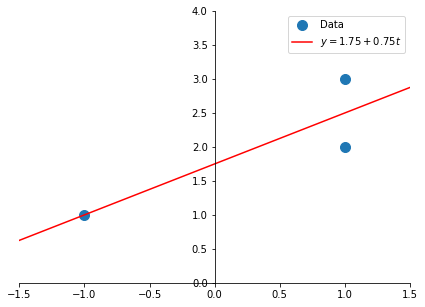

In [7]:
data = [(1, 2), (-1, 1), (1, 3)]
d = 1 # line
x = np.array([dd[0] for dd in data])
y = np.array([dd[1] for dd in data])

c=symbols('c0:%d' %(d+1))
t=symbols('t')
Fs,P=normalEquations(data,d)
print("The model of lines is of the form y =",P(t),'\n')

A=np.array([Fs(1,0),Fs(0,1)]).T

b=y 
A1=np.dot(A.T,A)
b1=np.dot(A.T,b)
X=ls_ne_solution(A1,b1)

print("Normal equations matrix A =",'\n',A,'\n')
print("A^TA =",'\n',A1,'\n')

li="y = %.2f + %.2f t" %(X[0],X[1])  #c,m)  #X[0], X[1], X[2]) 
ti="The best least square fitted line is " + li.replace("+ -","- ")
print(ti)
r = b - np.dot(A,X)
print("The residual of the least squares solution of this inconsistent system is",[round(rr,3) for rr in r.tolist()])
euclNorm = np.linalg.norm(r)
sqE = sum([rr**2 for rr in r.tolist()])
RMSE = np.sqrt(sqE/len(r))
print("The 2-norm of the error is",round(euclNorm,3))
print("The squared error is",round(sqE,3))
print("The root mean squared error is",round(RMSE,3))

fig = plt.figure(figsize=(7,5))  
ax = fig.add_subplot(1, 1, 1)
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center') #zero')  #
ax.spines['bottom'].set_position('zero')  #center') #
# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

XX = np.linspace(min(x)-0.5,max(x)+0.5,100)
f = lambda z: X[0] + X[1]*z
YY = [f(xx) for xx in XX]
plt.xlim([min(x)-0.5,max(x)+0.5])
plt.ylim([min(y)-1,max(y)+1])

plt.plot(x, y, 'o', label='Data', markersize=10);
plt.plot(XX, YY, 'r', label=poly2latex(poly=[X[1],X[0]], variable="t", width=2)); #m,c  m*x + c
plt.legend();
plt.show()

#### Solution using numpy

The best least square fitted line is y = 1.75 + 0.75 t
The 2-norm of the error is 0.707
The squared error is 0.5
The root mean squared error is 0.408


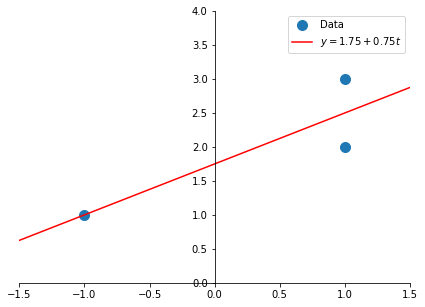

In [8]:
data = [(1, 2), (-1, 1), (1, 3)]
d=1 # lines
x = np.array([dd[0] for dd in data])
y = np.array([dd[1] for dd in data])

A = np.vstack([x, np.ones(len(x))]).T

m, c = np.linalg.lstsq(A, y, rcond=None)[0]
m, c = m.astype(float),c.astype(float)

li="y = %.2f + %.2f t" %(c,m) 
ti="The best least square fitted line is " + li.replace("+ -","- ")
print(ti)

lsf=lambda z: c+m*z
lx=[lsf(xx) for xx in x]
r=np.array([y[i]-lx[i] for i in range(len(data))])

euclNorm = np.linalg.norm(r)
sqE = sum([rr**2 for rr in r.tolist()])
RMSE = np.sqrt(sqE/len(r))
print("The 2-norm of the error is",round(euclNorm,3))
print("The squared error is",round(sqE,3))
print("The root mean squared error is",round(RMSE,3))

fig = plt.figure(figsize=(7,5))  
ax = fig.add_subplot(1, 1, 1)
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center') #zero')  #
ax.spines['bottom'].set_position('zero')  #center') #
# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

XX = np.linspace(min(x)-0.5,max(x)+0.5,100)
YY = [lsf(xx) for xx in XX]
plt.xlim([min(x)-0.5,max(x)+0.5])
plt.ylim([min(y)-1,max(y)+1])

plt.plot(x, y, 'o', label='Data', markersize=10);
plt.plot(XX, YY, 'r', label=poly2latex(poly=[m,c], variable="t", width=2)); #m*x + c
plt.legend();
plt.show()

### <span style="color:#19bfc2">EXAMPLE 4.4</span>

<span style="font-size:large;">Find the best line and best parabola for the four data points $(−1, 1), (0, 0), (1, 0), (2, −2)$.

#### Best line fit through normal equations

The model of lines is of the form y = c0 + c1*t 

Normal equations matrix A = 
 [[ 1 -1]
 [ 1  0]
 [ 1  1]
 [ 1  2]] 

A^TA = 
 [[4 2]
 [2 6]] 

The best least square fitted line is y = 0.20 - 0.90 t
The residual of the least squares solution of this inconsistent system is [-0.1, -0.2, 0.7, -0.4]
The 2-norm of the error is 0.837
The squared error is 0.7
The root mean squared error is 0.418


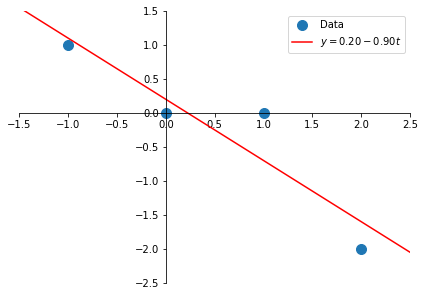

In [9]:
data = [(-1, 1), (0, 0), (1, 0), (2, -2)]
d=1 # lines
x = np.array([dd[0] for dd in data])
y = np.array([dd[1] for dd in data])
    
c=symbols('c0:%d' %(d+1))
t=symbols('t')
Fs,P=normalEquations(data,d)
print("The model of lines is of the form y =",P(t),'\n')

A=np.array([Fs(1,0),Fs(0,1)]).T

b=y 
A1=np.dot(A.T,A)
b1=np.dot(A.T,b)
X=ls_ne_solution(A1,b1)

print("Normal equations matrix A =",'\n',A,'\n')
print("A^TA =",'\n',A1,'\n')

li="y = %.2f + %.2f t" %(X[0], X[1]) 
ti="The best least square fitted line is " + li.replace("+ -","- ")
print(ti)
r = b - np.dot(A,X)
print("The residual of the least squares solution of this inconsistent system is",[round(rr,3) for rr in r.tolist()])
euclNorm = np.linalg.norm(r)
sqE = sum([rr**2 for rr in r.tolist()])
RMSE = np.sqrt(sqE/len(r))
print("The 2-norm of the error is",round(euclNorm,3))
print("The squared error is",round(sqE,3))
print("The root mean squared error is",round(RMSE,3))

fig = plt.figure(figsize=(7,5))  
ax = fig.add_subplot(1, 1, 1)
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('zero')  #center') #
ax.spines['bottom'].set_position('zero')  #center') #
# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

XX = np.linspace(min(x)-0.5,max(x)+0.5,100)
f = lambda z: X[0] + X[1]*z
YY = [f(xx) for xx in XX]
plt.xlim([min(x)-0.5,max(x)+0.5])
plt.ylim([min(y)-0.5,max(y)+0.5])

plt.plot(x, y, 'o', label='Data', markersize=10);
plt.plot(XX, YY, 'r', label=poly2latex(poly=[X[1],X[0]], variable="t", width=2)); #m*x + c  m,c
plt.legend();
plt.show()

#### Best parabola through normal equations

The model of parabolas is of the form y = c0 + c1*t + c2*t**2 

Normal equations matrix A = 
 [[ 1 -1  1]
 [ 1  0  0]
 [ 1  1  1]
 [ 1  2  4]] 

A^TA = 
 [[ 4  2  6]
 [ 2  6  8]
 [ 6  8 18]] 

The best least square fitted parabola is y = 0.45 - 0.65 t - 0.25 t**2
The residual of the least squares solution of this inconsistent system is [0.15, -0.45, 0.45, -0.15]
The 2-norm of the error is 0.671
The squared error is 0.45
The root mean squared error is 0.335


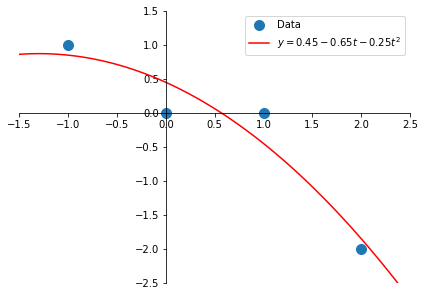

In [10]:
data = [(-1, 1), (0, 0), (1, 0), (2, -2)]
d = 2 # parabola
x = np.array([d[0] for d in data])
y = np.array([d[1] for d in data])

c=symbols('c0:%d' %(d+1))
t=symbols('t')
Fs,P=normalEquations(data,d)
print("The model of parabolas is of the form y =",P(t),'\n')

A=np.array([Fs(1,0,0),Fs(0,1,0),Fs(0,0,1)]).T

b=y 
A1=np.dot(A.T,A)
b1=np.dot(A.T,b)
X=ls_ne_solution(A1,b1)

print("Normal equations matrix A =",'\n',A,'\n')
print("A^TA =",'\n',A1,'\n')

li="y = %.2f + %.2f t + %.2f t**2" %(X[0], X[1], X[2]) 
ti="The best least square fitted parabola is " + li.replace("+ -","- ")
print(ti)
r = b - np.dot(A,X)
print("The residual of the least squares solution of this inconsistent system is",[round(rr,3) for rr in r.tolist()])
euclNorm = np.linalg.norm(r)
sqE = sum([rr**2 for rr in r.tolist()])
RMSE = np.sqrt(sqE/len(r))
print("The 2-norm of the error is",round(euclNorm,3))
print("The squared error is",round(sqE,3))
print("The root mean squared error is",round(RMSE,3))

fig = plt.figure(figsize=(7,5))  
ax = fig.add_subplot(1, 1, 1)
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('zero')  #center') #
ax.spines['bottom'].set_position('zero')  #center') #
# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

XX = np.linspace(min(x)-0.5,max(x)+0.5,100)
f = lambda z: X[2]*z**2 + X[1]*z + X[0]
YY = [f(xx) for xx in XX]
plt.xlim([min(x)-0.5,max(x)+0.5])
plt.ylim([min(y)-0.5,max(y)+0.5])

plt.plot(x, y, 'o', label='Data', markersize=10);
plt.plot(XX, YY, 'r', label=poly2latex(poly=[X[2], X[1], X[0]], variable="t", width=2)); #m*x + c
plt.legend();
plt.show()

#### Best parabola fit using numby

The best least square fitted parabola is $y = 0.45-0.65 t-0.25 t^2$
The 2-norm of the error is 0.671
The squared error is 0.45
The root mean squared error is 0.335


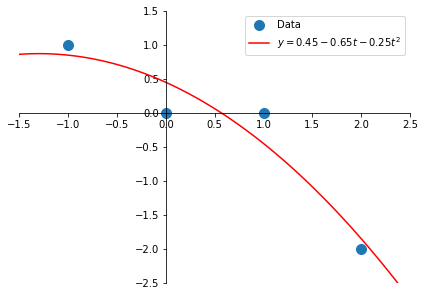

In [11]:
data = [(-1, 1), (0, 0), (1, 0), (2, -2)]
x = np.array([d[0] for d in data])
y = np.array([d[1] for d in data])

ti="The best least square fitted parabola is "+poly2latex(poly=np.polyfit(x, y, 2), variable="t", width=2)
print(ti)

z = np.polyfit(x, y, 2)
f = np.poly1d(z)

lx=[f(xx) for xx in x]
r=np.array([y[i]-lx[i] for i in range(len(data))])

euclNorm = np.linalg.norm(r)
sqE = sum([rr**2 for rr in r.tolist()])
RMSE = np.sqrt(sqE/len(r))
print("The 2-norm of the error is",round(euclNorm,3))
print("The squared error is",round(sqE,3))
print("The root mean squared error is",round(RMSE,3))

fig = plt.figure(figsize=(7,5))  
ax = fig.add_subplot(1, 1, 1)
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('zero')  #center') #
ax.spines['bottom'].set_position('zero')  #center') #
# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

X = np.linspace(min(x)-0.5,max(x)+0.5,100)
Y = [f(xx) for xx in X]
plt.xlim([min(x)-0.5,max(x)+0.5])
plt.ylim([min(y)-0.5,max(y)+0.5])

plt.plot(x, y, 'o', label='Data', markersize=10);
plt.plot(X, Y, 'r', label=poly2latex(poly=np.polyfit(x, y, 2), variable="t", width=2)); #m*x + c
plt.legend();
plt.show()

### 4.1.3 Conditioning of least squares

How accurately can the least squares solution $x$ be determined? This is a question about the forward error of the normal equations. We carry out a numerical experiment to test this question, by solving the fitting model in a case where the correct answer is known.

### <span style="color:#19bfc2">EXAMPLE 4.5</span>

<span style="font-size:large;">Let $x_1 = 2.0, x_2 = 2.2, x_3 = 2.4, \ldots, x_{11} = 4.0$ be equally spaced points in $[2,4]$, and set $y_i = 1 + x_i + x _i^2 + x_i^3 + x_i^4 + x_i^5 + x_i^6 + x_i^7$ for $1 \leq i \leq 11$. Find the best least squares degree 7 polynomial fit of the points $(x_i,y_i)$.

In this example, the system $Ac = b$ of normal equations is:

$$
\begin{bmatrix}
1&x_1&x_1^2& \cdots &x_1^7\\
1&x_2&x_2^2& \cdots &x_2^7\\
\cdot&\cdot&\cdot& \cdots &\cdot\\
\cdot&\cdot&\cdot& \cdots &\cdot\\
\cdot&\cdot&\cdot& \cdots &\cdot\\
1&x_{11}&x_{11}^2& \cdots &x_{11}^7
\end{bmatrix}
\begin{bmatrix}c_1\\c_2\\ \cdot \\ \cdot \\ \cdot \\ c_8 \end{bmatrix} =
\begin{bmatrix}y_1\\y_2\\ \cdot \\ \cdot \\ \cdot \\ y_{11} \end{bmatrix}.
$$

This coefficient matrix $A$, called **Van der Monde matrix**, is a matrix whose $j$th column consists of the elements of the second column raised to the $(j − 1)$st power.

The model of parabolas is of the form y = c0 + c1*t + c2*t**2 + c3*t**3 + c4*t**4 + c5*t**5 + c6*t**6 + c7*t**7 

Normal equations matrix A = 
 [[1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00
  1.60000000e+01 3.20000000e+01 6.40000000e+01 1.28000000e+02]
 [1.00000000e+00 2.20000000e+00 4.84000000e+00 1.06480000e+01
  2.34256000e+01 5.15363200e+01 1.13379904e+02 2.49435789e+02]
 [1.00000000e+00 2.40000000e+00 5.76000000e+00 1.38240000e+01
  3.31776000e+01 7.96262400e+01 1.91102976e+02 4.58647142e+02]
 [1.00000000e+00 2.60000000e+00 6.76000000e+00 1.75760000e+01
  4.56976000e+01 1.18813760e+02 3.08915776e+02 8.03181018e+02]
 [1.00000000e+00 2.80000000e+00 7.84000000e+00 2.19520000e+01
  6.14656000e+01 1.72103680e+02 4.81890304e+02 1.34929285e+03]
 [1.00000000e+00 3.00000000e+00 9.00000000e+00 2.70000000e+01
  8.10000000e+01 2.43000000e+02 7.29000000e+02 2.18700000e+03]
 [1.00000000e+00 3.20000000e+00 1.02400000e+01 3.27680000e+01
  1.04857600e+02 3.35544320e+02 1.07374182e+

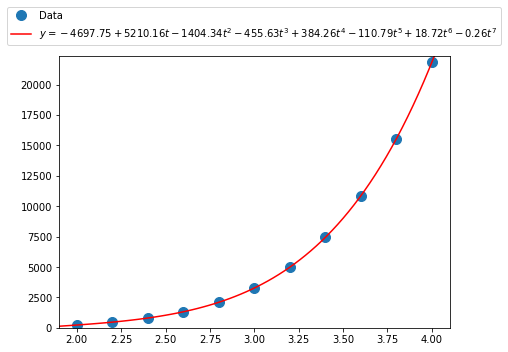

In [12]:
x = np.arange(2,4.2,0.2)
d = 7 # degree 7 polynomial
yf = lambda x: 1+x+x**2+x**3+x**4+x**5+x**6+x**7
y=[yf(xx) for xx in x]
data = [[x[i],y[i]] for i in range(len(x))]

c=symbols('c0:%d' %(d+1))
t=symbols('t')
Fs,P=normalEquations(data,d)
print("The model of parabolas is of the form y =",P(t),'\n')

A=np.array([Fs(1,0,0,0,0,0,0,0),
Fs(0,1,0,0,0,0,0,0),
Fs(0,0,1,0,0,0,0,0),
Fs(0,0,0,1,0,0,0,0),
Fs(0,0,0,0,1,0,0,0),
Fs(0,0,0,0,0,1,0,0),
Fs(0,0,0,0,0,0,1,0),
Fs(0,0,0,0,0,0,0,1)]).T

b=y 
A1=np.dot(A.T,A)
b1=np.dot(A.T,b)
X=ls_ne_solution(A1,b1)

print("Normal equations matrix A =",'\n',A,'\n')
print("A^TA =",'\n',A1,'\n')

li="y = %.2f + %.2f t + %.2f t**2 + %.2f t**3 + %.2f t**4 + %.2f t**5 + %.2f t**6 + %.2f t**7" %(X[0], X[1], X[2], X[3], X[4], X[5], X[6], X[7]) 
ti="The best least square fitted degree 7 polynomial is " + li.replace("+ -","- ")
print(ti)
r = b - np.dot(A,X)
print("The residual of the least squares solution of this inconsistent system is",[round(rr,3) for rr in r.tolist()])
euclNorm = np.linalg.norm(r)
sqE = sum([rr**2 for rr in r.tolist()])
RMSE = np.sqrt(sqE/len(r))
print("The 2-norm of the error is",round(euclNorm,3))
print("The squared error is",round(sqE,3))
print("The root mean squared error is",round(RMSE,3))
print("The condition number of A^TA is",np.linalg.cond(A1,-2))

fig = plt.figure(figsize=(7,5))  
ax = fig.add_subplot(1, 1, 1)

XX = np.linspace(min(x)-0.5,max(x)+0.5,100)
f = lambda z: X[0]+X[1]*z+X[2]*z**2+X[3]*z**3+X[4]*z**4+X[5]*z**5+X[6]*z**6+X[7]*z**7
YY = [f(xx) for xx in XX]
plt.xlim([min(x)-0.1,max(x)+0.1])
plt.ylim([0,max(y)+500])

plt.plot(x, y, 'o', label='Data', markersize=10);
plt.plot(XX, YY, 'r', label=poly2latex(poly=[X[7],X[6],X[5],X[4],X[3],X[2],X[1],X[0]], variable="t", width=2)); #m*x + c
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2))
plt.show()

#### Best degree 7 polynomial fit using numby

The best least square fitted degree 7 polynomial is $y = 1.00+1.00 t+1.00 t^2+1.00 t^3+1.00 t^4+1.00 t^5+1.00 t^6+1.00 t^7$
The 2-norm of the error is 0.0
The squared error is 0.0
The root mean squared error is 0.0


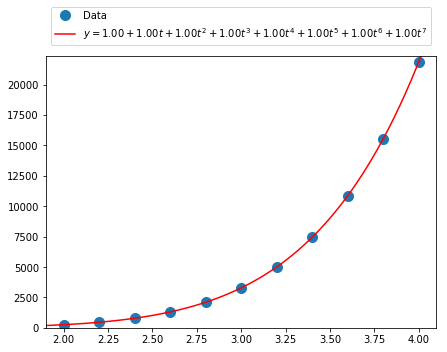

In [13]:
x = np.arange(2,4.2,0.2)
yf = lambda x: 1+x+x**2+x**3+x**4+x**5+x**6+x**7
y=[yf(xx) for xx in x]

ti="The best least square fitted degree 7 polynomial is "+poly2latex(poly=np.polyfit(x, y, 7), variable="t", width=2)
print(ti)

z = np.polyfit(x, y, 7)
f = np.poly1d(z)

lx=[f(xx) for xx in x]
r=np.array([y[i]-lx[i] for i in range(len(data))])

euclNorm = np.linalg.norm(r)
sqE = sum([rr**2 for rr in r.tolist()])
RMSE = np.sqrt(sqE/len(r))
print("The 2-norm of the error is",round(euclNorm,3))
print("The squared error is",round(sqE,3))
print("The root mean squared error is",round(RMSE,3))

fig = plt.figure(figsize=(7,5))  
ax = fig.add_subplot(1, 1, 1)

X = np.linspace(min(x)-0.5,max(x)+0.5,100)
Y = [f(xx) for xx in X]
plt.xlim([min(x)-0.1,max(x)+0.1])
plt.ylim([0,max(y)+500])

plt.plot(x, y, 'o', label='Data', markersize=10);
plt.plot(X, Y, 'r', label=poly2latex(poly=np.polyfit(x, y, 7), variable="t", width=2)); #m*x + c
# plt.legend();
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2))
plt.show()

## 4.2 A Survey of Models

### 4.2.1 Periodic data

### <span style="color:#19bfc2">EXAMPLE 4.6</span>

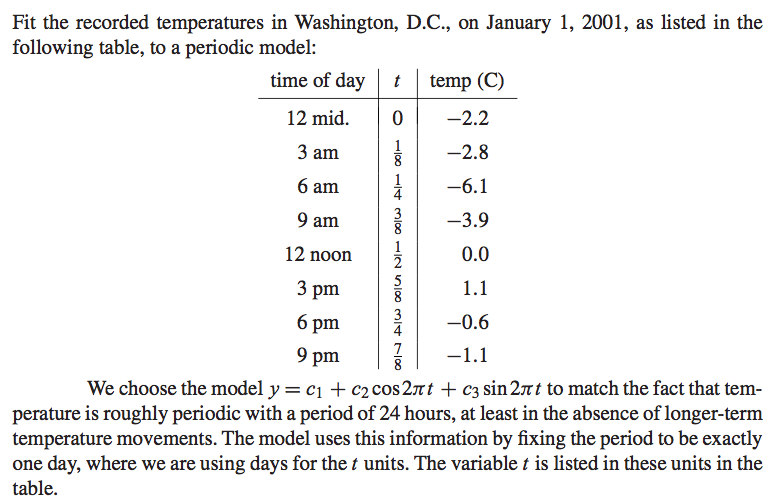

In [14]:
Image(filename='Images/04_2.png')

The model of trigonometric functions is of the form y = c1 + c2*cos(2*pi*t) + c3*sin(2*pi*t) 

Normal equations matrix A = 
 [[ 1.          1.          0.        ]
 [ 1.          0.70710678  0.70710678]
 [ 1.          0.          1.        ]
 [ 1.         -0.70710678  0.70710678]
 [ 1.         -1.          0.        ]
 [ 1.         -0.70710678 -0.70710678]
 [ 1.          0.         -1.        ]
 [ 1.          0.70710678 -0.70710678]] 

A^TA = 
 [[ 8.00000000e+00 -1.11022302e-16 -2.22044605e-16]
 [-1.11022302e-16  4.00000000e+00  1.53686518e-16]
 [-2.22044605e-16  1.53686518e-16  4.00000000e+00]] 

The best least square model fit is y = -1.95 - 0.74*cos(2*pi*t) - 2.56*sin(2*pi*t)
The residual of the least squares solution of this inconsistent system is [0.494, 1.486, -1.591, -0.667, 1.206, 0.714, -1.209, -0.433]
The 2-norm of the error is 3.007
The squared error is 9.041
The root mean squared error is 1.063


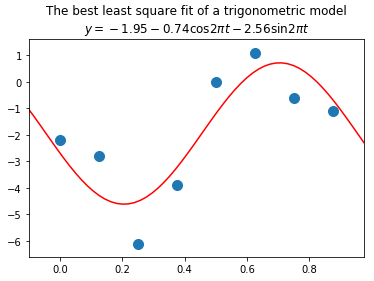

In [15]:
time=np.arange(0,1,1/8)
temperature=np.array([-2.2,-2.8,-6.1,-3.9,0.,1.1,-0.6,-1.1])
data = [[time[i],temperature[i]] for i in range(len(time))]

x = np.array([dd[0] for dd in data])
y = np.array([dd[1] for dd in data])

d = 2 # since the model includes 2 coefficients
c=symbols('c1:%d' %(d+2))
t=symbols('t')
model = c[0] + c[1]*cos(2*pi*t) + c[2]*sin(2*pi*t)
print("The model of trigonometric functions is of the form y =",model.evalf(),'\n')

AA=[]
for k in range(len(x)):
    AA.append(model.subs(t,x[k])) #.evalf())
AA=np.array(AA)
AAA=lambdify(c,AA,'numpy')

A=np.array([AAA(1,0,0),
AAA(0,1,0),
AAA(0,0,1)]).T

b=y 
A1=np.dot(A.T,A)
b1=np.dot(A.T,b)
X=ls_ne_solution(A1,b1)

print("Normal equations matrix A =",'\n',A,'\n')
print("A^TA =",'\n',A1,'\n')

li="y = %.2f + %.2f*cos(2*pi*t) + %.2f*sin(2*pi*t)" %(X[0], X[1], X[2]) 
ti="The best least square model fit is " + li.replace("+ -","- ")
print(ti)
r = b - np.dot(A,X)
print("The residual of the least squares solution of this inconsistent system is",[round(rr,3) for rr in r.tolist()])
euclNorm = np.linalg.norm(r)
sqE = sum([rr**2 for rr in r.tolist()])
RMSE = np.sqrt(sqE/len(r))
print("The 2-norm of the error is",round(euclNorm,3))
print("The squared error is",round(sqE,3))
print("The root mean squared error is",round(RMSE,3))

XX = np.linspace(min(x)-0.5,max(x)+0.5,100)
f = lambda z: X[0]+X[1]*cos(2*pi*z)+X[2]*sin(2*pi*z)
YY = [f(xx) for xx in XX]
plt.xlim([min(x)-0.1,max(x)+0.1])
plt.ylim([min(y)-0.5,max(y)+0.5])

plt.plot(x, y, 'o', label='Data', markersize=10);
plt.plot(XX, YY, 'r') 
ti1="The best least square fit of a trigonometric model"
li='$y = -1.95 - 0.74 \cos 2 \pi t - 2.56 \sin 2 \pi t$'
ti=ti1+'\n'+li
plt.title(ti)
plt.show()

### <span style="color:#19bfc2">EXAMPLE 4.7</span>

<span style="font-size:large;">Fit the temperature data to the improved model: 
<p/>
<span style="font-size:large;">
$$y = c_1 + c_2 \cos 2\pi t + c_3 \sin 2 \pi t + c_4 \cos 4 \pi t.$$

The model of trigonometric functions is of the form y = c1 + c2*cos(2*pi*t) + c3*sin(2*pi*t) + c4*cos(4*pi*t) 

Normal equations matrix A = 
 [[ 1.          1.          0.          1.        ]
 [ 1.          0.70710678  0.70710678  0.        ]
 [ 1.          0.          1.         -1.        ]
 [ 1.         -0.70710678  0.70710678  0.        ]
 [ 1.         -1.          0.          1.        ]
 [ 1.         -0.70710678 -0.70710678  0.        ]
 [ 1.          0.         -1.         -1.        ]
 [ 1.          0.70710678 -0.70710678  0.        ]] 

A^TA = 
 [[ 8.00000000e+00 -1.11022302e-16 -2.22044605e-16  0.00000000e+00]
 [-1.11022302e-16  4.00000000e+00  1.53686518e-16  0.00000000e+00]
 [-2.22044605e-16  1.53686518e-16  4.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  4.00000000e+00]] 

The best least square model fit is y = -1.95 - 0.74*cos(2*pi*t) - 2.56*sin(2*pi*t) + 1.12*sin(4*pi*t)
The residual of the least squares solution of this inconsistent s

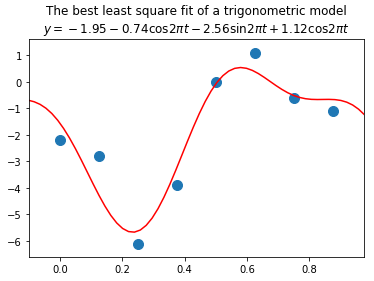

In [16]:
time=np.arange(0,1,1/8)
temperature=np.array([-2.2,-2.8,-6.1,-3.9,0.,1.1,-0.6,-1.1])
data = [[time[i],temperature[i]] for i in range(len(time))]

x = np.array([dd[0] for dd in data])
y = np.array([dd[1] for dd in data])

d = 3 # since the model includes 4 coefficients
c=symbols('c1:%d' %(d+2))
t=symbols('t')
model = c[0] + c[1]*cos(2*pi*t) + c[2]*sin(2*pi*t) + c[3]*cos(4*pi*t)
print("The model of trigonometric functions is of the form y =",model.evalf(),'\n')

AA=[]
for k in range(len(x)):
    AA.append(model.subs(t,x[k])) #.evalf())
AA=np.array(AA)
AAA=lambdify(c,AA,'numpy')

A=np.array([AAA(1,0,0,0),
AAA(0,1,0,0),
AAA(0,0,1,0),
AAA(0,0,0,1)]).T

b=y 
A1=np.dot(A.T,A)
b1=np.dot(A.T,b)
X=ls_ne_solution(A1,b1)

print("Normal equations matrix A =",'\n',A,'\n')
print("A^TA =",'\n',A1,'\n')

li="y = %.2f + %.2f*cos(2*pi*t) + %.2f*sin(2*pi*t) + %.2f*sin(4*pi*t)" %(X[0], X[1], X[2], X[3]) 
ti="The best least square model fit is " + li.replace("+ -","- ")
print(ti)
r = b - np.dot(A,X)
print("The residual of the least squares solution of this inconsistent system is",[round(rr,3) for rr in r.tolist()])
euclNorm = np.linalg.norm(r)
sqE = sum([rr**2 for rr in r.tolist()])
RMSE = np.sqrt(sqE/len(r))
print("The 2-norm of the error is",round(euclNorm,3))
print("The squared error is",round(sqE,3))
print("The root mean squared error is",round(RMSE,3))

XX = np.linspace(min(x)-0.5,max(x)+0.5,100)
f = lambda z: X[0]+X[1]*cos(2*pi*z)+X[2]*sin(2*pi*z)+X[3]*cos(4*pi*z)
YY = [f(xx) for xx in XX]
plt.xlim([min(x)-0.1,max(x)+0.1])
plt.ylim([min(y)-0.5,max(y)+0.5])

plt.plot(x, y, 'o', label='Data', markersize=10);
plt.plot(XX, YY, 'r') 
ti1="The best least square fit of a trigonometric model"
li='$y = -1.95 - 0.74 \cos 2 \pi t - 2.56 \sin 2 \pi t + 1.12 \cos 2 \pi t$'
ti=ti1+'\n'+li
plt.title(ti)
plt.show()

### 4.2.2 Data linearization

### (a) The case of the exponential model $y = c_1 e^{c_{2}t}$

### <span style="color:#19bfc2">EXAMPLE 4.8</span>

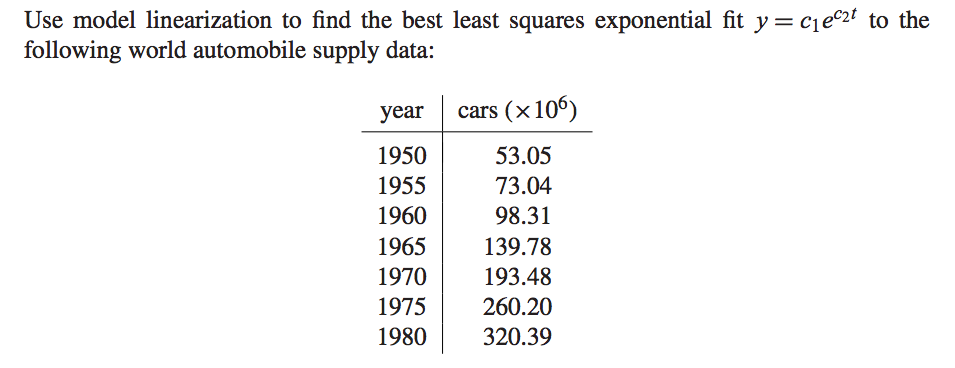

In [17]:
Image(filename='Images/04_3.png')

Normal equations matrix A = 
 [[   1 1950]
 [   1 1955]
 [   1 1960]
 [   1 1965]
 [   1 1970]
 [   1 1975]
 [   1 1980]] 

A^TA = 
 [[       7    13755]
 [   13755 27029275]] 

The best least square logarithmic fitted line is -115.97509 + 0.06152 t
The 2-norm of the error is 0.094
The squared error is 0.009
The root mean squared error is 0.036


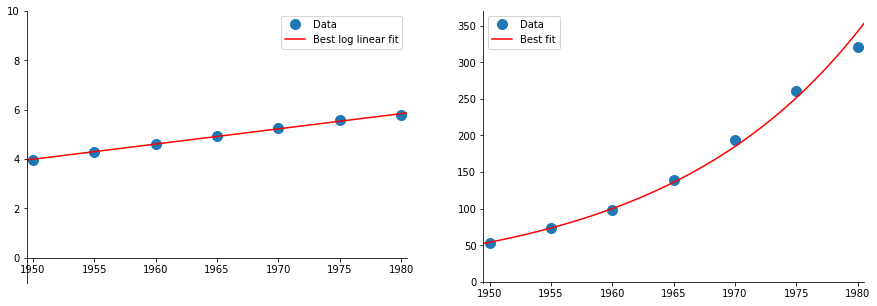

In [18]:
x = np.arange(1950,1981,5)
y = [53.05, 73.04, 98.31, 139.78, 193.48, 260.20, 320.39]
logy=[np.log(yy) for yy in y]
data = [[x[i],y[i]] for i in range(len(x))]

d=1
c=symbols('c0:%d' %(d+1))
t=symbols('t')
Fs,P=normalEquations(data,d)

A=np.array([Fs(1,0),Fs(0,1)]).T

b=logy 
A1=np.dot(A.T,A)
b1=np.dot(A.T,logy) #b)
X=ls_ne_solution(A1,b1)

print("Normal equations matrix A =",'\n',A,'\n')
print("A^TA =",'\n',A1,'\n')

m, c = np.linalg.lstsq(A, logy, rcond=None)[0]
m, c = m.astype(float),c.astype(float)

li="%.5f + %.5f t" %(m,c)     
ti="The best least square logarithmic fitted line is " + li.replace("+ -","- ")
print(ti)

lsf=lambda z: m + c*z   # np.exp(c)*np.exp(m*z)
lx=[lsf(xx) for xx in x]
r=np.array([logy[i]-lx[i] for i in range(len(data))])

euclNorm = np.linalg.norm(r)
sqE = sum([rr**2 for rr in r.tolist()])
RMSE = np.sqrt(sqE/len(r))
print("The 2-norm of the error is",round(euclNorm,3))
print("The squared error is",round(sqE,3))
print("The root mean squared error is",round(RMSE,3))

#1

fig = plt.figure(figsize=(15,5))  

ax1 = fig.add_subplot(1, 2, 1)

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
# ax.spines['left'].set_position('center') #zero')  #
ax1.spines['bottom'].set_position('zero')  #center') #
# Eliminate upper and right axes
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
# Show ticks in the left and lower axes only
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')

XX = np.linspace(min(x)-0.5,max(x)+0.5,100)
YY = [lsf(xx) for xx in XX]
plt.xlim([min(x)-0.5,max(x)+0.5])
plt.ylim([-1,10])  #max(y)+50])

plt.plot(x, logy, 'o', label='Data', markersize=10);
plt.plot(XX, YY, 'r', label="Best log linear fit")
plt.legend();
# plt.show()

# 2

ax2 = fig.add_subplot(1, 2, 2)

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
# ax.spines['left'].set_position('center') #zero')  #
ax2.spines['bottom'].set_position('zero')  #center') #
# Eliminate upper and right axes
ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')
# Show ticks in the left and lower axes only
ax2.xaxis.set_ticks_position('bottom')
ax2.yaxis.set_ticks_position('left')

XX = np.linspace(min(x)-0.5,max(x)+0.5,100)
f = lambda z: np.exp(m) * np.exp(c*z)
YY = [f(xx) for xx in XX]
plt.xlim([min(x)-0.5,max(x)+0.5])
plt.ylim([-1,max(y)+50])

plt.plot(x, y, 'o', label='Data', markersize=10);
plt.plot(XX, YY, 'r', label="Best fit")
plt.legend();
plt.show()

### <span style="color:#19bfc2">EXAMPLE 4.9</span>

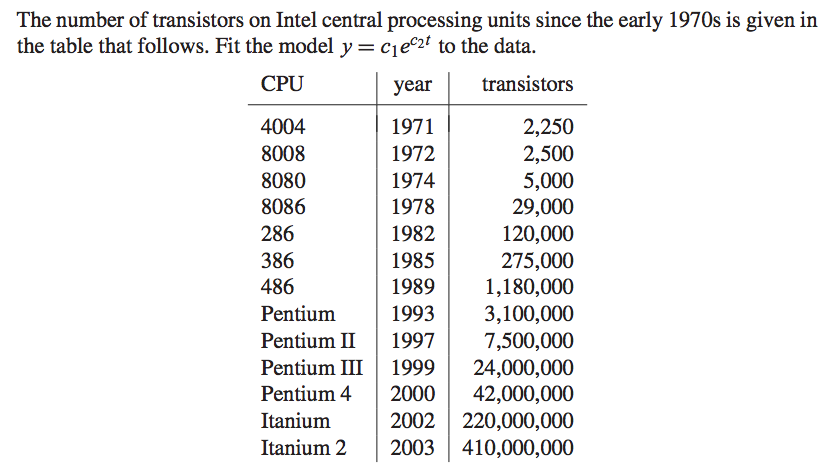

In [19]:
Image(filename='Images/04_4.png')

Normal equations matrix A = 
 [[ 1  1]
 [ 1  2]
 [ 1  4]
 [ 1  8]
 [ 1 12]
 [ 1 15]
 [ 1 19]
 [ 1 23]
 [ 1 27]
 [ 1 29]
 [ 1 30]
 [ 1 32]
 [ 1 33]] 

A^TA = 
 [[  13  235]
 [ 235 5927]] 

The best least square logarithmic fitted line is 7.19694 + 0.35464 t
The 2-norm of the error is 1.686
The squared error is 2.842
The root mean squared error is 0.468
The best fit for a least square exponential function is y = 0.07 exp^{0.68 t}


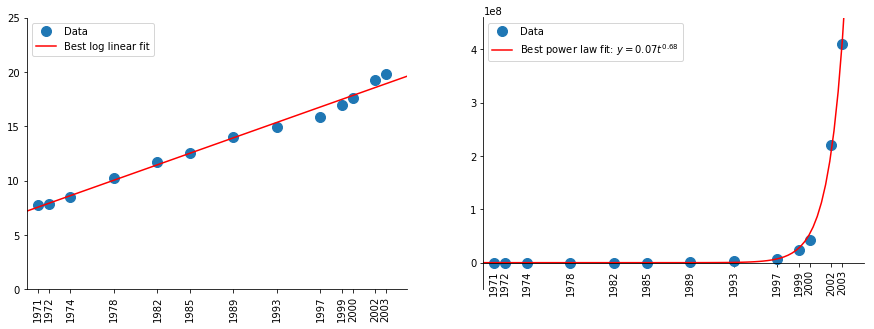

In [20]:
x0 = [1971, 1972, 1974, 1978, 1982, 1985, 1989, 1993, 1997, 1999, 2000, 2002, 2003]
x=[x-1970 for x in x0]
y = [2250,2500,5000,29000,120000,275000,1180000,3100000,7500000,24000000,42000000,220000000,410000000]
logy=[np.log(yy) for yy in y]
data = [[x[i],y[i]] for i in range(len(x))]

d=1
c=symbols('c0:%d' %(d+1))
t=symbols('t')
Fs,P=normalEquations(data,d)

A=np.array([Fs(1,0),Fs(0,1)]).T

b=logy 
A1=np.dot(A.T,A)
b1=np.dot(A.T,logy) #b)
X=ls_ne_solution(A1,b1)

print("Normal equations matrix A =",'\n',A,'\n')
print("A^TA =",'\n',A1,'\n')

m, c = np.linalg.lstsq(A, logy, rcond=None)[0]
m, c = m.astype(float),c.astype(float)

li="%.5f + %.5f t" %(m,c)     
ti="The best least square logarithmic fitted line is " + li.replace("+ -","- ")
print(ti)

lsf=lambda z: m + c*z   # np.exp(c)*np.exp(m*z)
lx=[lsf(xx) for xx in x]
r=np.array([logy[i]-lx[i] for i in range(len(data))])

euclNorm = np.linalg.norm(r)
sqE = sum([rr**2 for rr in r.tolist()])
RMSE = np.sqrt(sqE/len(r))
print("The 2-norm of the error is",round(euclNorm,3))
print("The squared error is",round(sqE,3))
print("The root mean squared error is",round(RMSE,3))

#1

fig = plt.figure(figsize=(15,5))  

ax1 = fig.add_subplot(1, 2, 1)
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('zero')   #center') #  #
# ax1.spines['bottom'].set_position('zero')  #center') #
# Eliminate upper and right axes
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
# Show ticks in the left and lower axes only
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')

ax1.set_xticks(x)  #[::1])
labels=x0
ax1.set_xticklabels(labels, rotation=90)

XX = np.linspace(min(x)-1,max(x)+2,100)
YY = [lsf(xx) for xx in XX]

plt.xlim([min(x)-1,max(x)+2])
plt.ylim([0,25])  #max(y)+50])

plt.plot(x, logy, 'o', label='Data', markersize=10);
plt.plot(XX, YY, 'r', label="Best log linear fit")
plt.legend(loc='upper left');
# plt.show()

# 2

ax2 = fig.add_subplot(1, 2, 2)

def lsf(z, a, b):
    return a*np.exp(b*z)

m, c = curve_fit(lsf, x, y)[0]
m, c = m.astype(float),c.astype(float)

# print('\n',"m,c=",m,c,'\n')

li="y = %.2f exp^{%.2f t}" %(m,c)
ti="The best fit for a least square exponential function is " + li.replace("+ -","- ")
print(ti)

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
# ax.spines['left'].set_position('center') #zero')  #
ax2.spines['bottom'].set_position('zero')  #center') #
# Eliminate upper and right axes
ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')
# Show ticks in the left and lower axes only
ax2.xaxis.set_ticks_position('bottom')
ax2.yaxis.set_ticks_position('left')

ax2.set_xticks(x)  #[::1])
labels=x0
ax2.set_xticklabels(labels, rotation=90)

XX = np.linspace(0,max(x)+5,100)
YY = [lsf(xx,m,c) for xx in XX]
plt.xlim([min(x)-1,max(x)+2])
plt.ylim([-0.5e8,max(y)+0.5e8])

plt.plot(x, y, 'o', label='Data', markersize=10);
lli="Best power law fit: $y = %.2f t^{%.2f}$" %(m,c)
plt.plot(XX, YY, 'r', label=lli)

# f1 = lambda z: 9.77*z*np.exp(-0.215*z)
# YY1 = [f1(xx) for xx in XX]
# plt.plot(XX, YY1, 'g') #, label="Best fit")

plt.legend(loc='upper left');
plt.show()

### (b) The case of the power law model $y = c_1 t^{c_2}$

### <span style="color:#19bfc2">EXAMPLE 4.10</span>

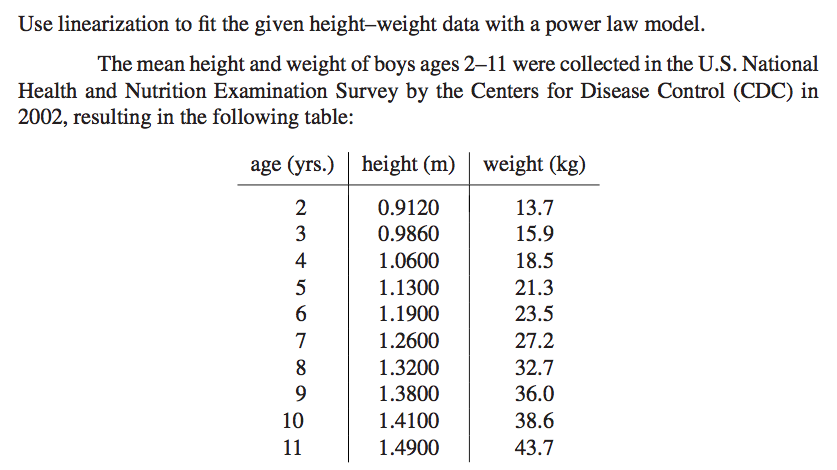

In [21]:
Image(filename='Images/04_5.png')

Normal equations matrix A = 
 [[1.    0.912]
 [1.    0.986]
 [1.    1.06 ]
 [1.    1.13 ]
 [1.    1.19 ]
 [1.    1.26 ]
 [1.    1.32 ]
 [1.    1.38 ]
 [1.    1.41 ]
 [1.    1.49 ]] 

A^TA = 
 [[10.      12.138  ]
 [12.138   15.06314]] 

The best least square logarithmic-linear fitted line is 0.74 + 2.06 t
The 2-norm of the error is 0.06
The squared error is 0.004
The root mean squared error is 0.019
The best fit for a least square exponential function is y = 15.89 t^{2.53}


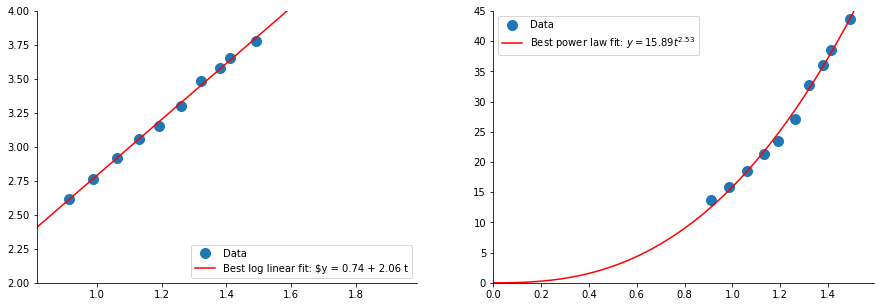

In [22]:
x=[0.9120,0.9860,1.0600,1.1300,1.1900,1.2600,1.3200,1.3800,1.4100,1.4900]
y=[13.7,15.9,18.5,21.3,23.5,27.2,32.7,36.0,38.6,43.7]
logy=[np.log(yy) for yy in y]
data = [[x[i],y[i]] for i in range(len(x))]

d=1
c=symbols('c0:%d' %(d+1))
t=symbols('t')
Fs,P=normalEquations(data,d)

A=np.array([Fs(1,0),Fs(0,1)]).T

b=logy
A1=np.dot(A.T,A)
b1=np.dot(A.T,logy) 
X=ls_ne_solution(A1,b1)

print("Normal equations matrix A =",'\n',A,'\n')
print("A^TA =",'\n',A1,'\n')

m, c = np.linalg.lstsq(A, logy, rcond=None)[0]
m, c = m.astype(float),c.astype(float)

li="%.2f + %.2f t" %(m,c)     
ti="The best least square logarithmic-linear fitted line is " + li.replace("+ -","- ")
print(ti)

lsf=lambda z: m + c*z   # np.exp(c)*np.exp(m*z)
lx=[lsf(xx) for xx in x]
r=np.array([logy[i]-lx[i] for i in range(len(data))])

euclNorm = np.linalg.norm(r)
sqE = sum([rr**2 for rr in r.tolist()])
RMSE = np.sqrt(sqE/len(r))
print("The 2-norm of the error is",round(euclNorm,3))
print("The squared error is",round(sqE,3))
print("The root mean squared error is",round(RMSE,3))

#1

fig = plt.figure(figsize=(15,5))  

ax1 = fig.add_subplot(1, 2, 1)

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
# ax.spines['left'].set_position('center') #zero')  #
# ax1.spines['bottom'].set_position('zero')  #center') #
# Eliminate upper and right axes
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
# Show ticks in the left and lower axes only
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')

XX = np.linspace(min(x)-0.1,max(x)+0.1,100)
YY = [lsf(xx) for xx in XX]
plt.xlim([min(x)-0.1,max(x)+0.5])
plt.ylim([2,4])  

plt.plot(x, logy, 'o', label='Data', markersize=10);
lli="Best log linear fit: $y = %.2f + %.2f t" %(m,c)
plt.plot(XX, YY, 'r', label=lli)
plt.legend(loc='lower right');
# plt.show()

# 2

ax2 = fig.add_subplot(1, 2, 2)

def lsf(z, a, b):
    return a*z**b

m, c = curve_fit(lsf, x, y)[0]
m, c = m.astype(float),c.astype(float)

# print('\n',"m,c=",m,c,'\n')

li="y = %.2f t^{%.2f}" %(m,c)
ti="The best fit for a least square exponential function is " + li.replace("+ -","- ")
print(ti)

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
# ax.spines['left'].set_position('center') #zero')  #
ax2.spines['bottom'].set_position('zero')  #center') #
# Eliminate upper and right axes
ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')
# Show ticks in the left and lower axes only
ax2.xaxis.set_ticks_position('bottom')
ax2.yaxis.set_ticks_position('left')

XX = np.linspace(0,max(x)+0.1,100)
# f = lambda z: np.exp(m) * np.exp(c*z) 
YY = [lsf(xx,m,c) for xx in XX]
plt.xlim([0,max(x)+0.1])
plt.ylim([0,45])

plt.plot(x, y, 'o', label='Data', markersize=10);
lli="Best power law fit: $y = %.2f t^{%.2f}$" %(m,c)
plt.plot(XX, YY, 'r', label=lli)

# f1 = lambda z: 16.3*z**(2.42)
# YY1 = [f1(xx) for xx in XX]
# plt.plot(XX, YY1, 'g') #, label="Best fit")

plt.legend(loc='upper left');
plt.show()

### (c) The case of the nonlinear exponential model $y = c_1 t e^{c_{2}t}$

### <span style="color:#19bfc2">EXAMPLE 4.11</span>

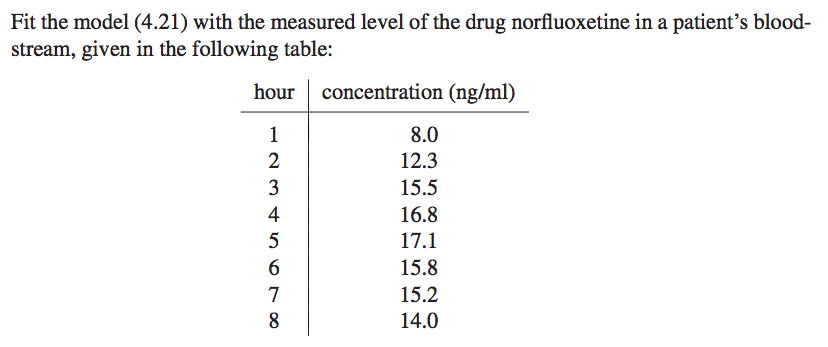

In [23]:
Image(filename='Images/04_6.png')

Normal equations matrix A = 
 [[1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]
 [1. 6.]
 [1. 7.]
 [1. 8.]] 

A^TA = 
 [[  8.  36.]
 [ 36. 204.]] 

The best least square logarithmic-linear fitted line is 2.37 + 0.06 t
The 2-norm of the error is 0.532
The squared error is 0.283
The root mean squared error is 0.188
The best fit for a least square exponential function is y = 9.80 t exp^{-0.22 t}


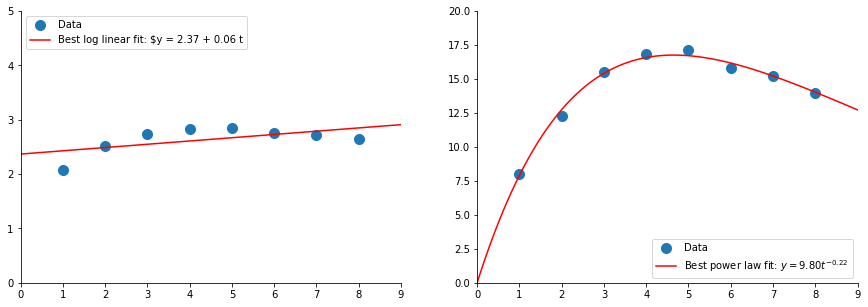

In [24]:
x=np.arange(1.,9.,1.)
y=[8.,12.3,15.5,16.8,17.1,15.8,15.2,14.]
logy=[np.log(yy) for yy in y]
data = [[x[i],y[i]] for i in range(len(x))]

d=1
c=symbols('c0:%d' %(d+1))
t=symbols('t')
Fs,P=normalEquations(data,d)

A=np.array([Fs(1,0),Fs(0,1)]).T

b=logy 
A1=np.dot(A.T,A)
b1=np.dot(A.T,logy) 
X=ls_ne_solution(A1,b1)

print("Normal equations matrix A =",'\n',A,'\n')
print("A^TA =",'\n',A1,'\n')

m, c = np.linalg.lstsq(A, logy, rcond=None)[0]
m, c = m.astype(float),c.astype(float)

li="%.2f + %.2f t" %(m,c)     
ti="The best least square logarithmic-linear fitted line is " + li.replace("+ -","- ")
print(ti)

lsf=lambda z: m + c*z   
lx=[lsf(xx) for xx in x]
r=np.array([logy[i]-lx[i] for i in range(len(data))])

euclNorm = np.linalg.norm(r)
sqE = sum([rr**2 for rr in r.tolist()])
RMSE = np.sqrt(sqE/len(r))
print("The 2-norm of the error is",round(euclNorm,3))
print("The squared error is",round(sqE,3))
print("The root mean squared error is",round(RMSE,3))

#1

fig = plt.figure(figsize=(15,5))  

ax1 = fig.add_subplot(1, 2, 1)

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
# ax.spines['left'].set_position('center') #zero')  #
# ax1.spines['bottom'].set_position('zero')  #center') #
# Eliminate upper and right axes
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
# Show ticks in the left and lower axes only
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')

XX = np.linspace(0,9,100)
YY = [lsf(xx) for xx in XX]
plt.xlim([0,9])
plt.ylim([0,5])  #max(y)+50])

plt.plot(x, logy, 'o', label='Data', markersize=10);
lli="Best log linear fit: $y = %.2f + %.2f t" %(m,c)
plt.plot(XX, YY, 'r', label=lli)
plt.legend(loc='upper left');
# plt.show()

# 2

ax2 = fig.add_subplot(1, 2, 2)

def lsf(z, a, b):
    return a*z*np.exp(b*z)

m, c = curve_fit(lsf, x, y)[0]
m, c = m.astype(float),c.astype(float)

# print('\n',"m,c=",m,c,'\n')

li="y = %.2f t exp^{%.2f t}" %(m,c)
ti="The best fit for a least square exponential function is " + li.replace("+ -","- ")
print(ti)

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
# ax.spines['left'].set_position('center') #zero')  #
ax2.spines['bottom'].set_position('zero')  #center') #
# Eliminate upper and right axes
ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')
# Show ticks in the left and lower axes only
ax2.xaxis.set_ticks_position('bottom')
ax2.yaxis.set_ticks_position('left')

XX = np.linspace(0,9,100)
# f = lambda z: np.exp(m) * np.exp(c*z) 
YY = [lsf(xx,m,c) for xx in XX]
plt.xlim([0,9])
plt.ylim([0,20])

plt.plot(x, y, 'o', label='Data', markersize=10);
lli="Best power law fit: $y = %.2f t^{%.2f}$" %(m,c)
plt.plot(XX, YY, 'r', label=lli)

# f1 = lambda z: 9.77*z*np.exp(-0.215*z)
# YY1 = [f1(xx) for xx in XX]
# plt.plot(XX, YY1, 'g') #, label="Best fit")

plt.legend(loc='lower right');
plt.show()